# Haal maxima van belastingen op

#  importeer de benodigde functies

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from toolbox_continu_inzicht import Config, DataAdapter
from toolbox_continu_inzicht.loads import LoadsWaterwebservicesRWS

In [2]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_rws_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

RWS_webservice = LoadsWaterwebservicesRWS(data_adapter=data)

lst_data = await RWS_webservice.run(input="BelastingLocaties", output="Waterstanden")

Configureer als volgt, zonder getij
```yaml
GlobalVariables:
    rootdir: "data_sets"  
    moments: [-24,0,24,48] 

    LoadsMaxima:
        tide: False

DataAdapter:
    waterstanden: 
        type: csv
        path: "hidden_waterstanden.csv"
        sep: ";"
    maxima:   
        type: csv
        path: "hidden_waterstanden_maxima.csv"       
```

In [3]:
from toolbox_continu_inzicht.loads import LoadsToMoments

In [4]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_to_moments_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

maxima = LoadsToMoments(data_adapter=data)

maxima.run(input="waterstanden", output="maxima")

In [5]:
df_out = RWS_webservice.df_out

In [20]:
# split de dataframe in tweeën & process
values_nan = df_out[df_out["value"] == -999].index
for val in values_nan:
    df_out.loc[val, "value"] = np.nan
df_out.sort_index()
df_plot = df_out.set_index(df_out["datetime"])
df_plot = df_plot[df_plot["measurement_location_id"] == 8420]
measurement_index = df_plot["value_type"] == "verwachting"
df_plot_measurements = df_plot[measurement_index][["value"]]
df_plot_forecast = df_plot[~measurement_index][["value"]]

In [21]:
df_plot_moments = maxima.df_out

In [22]:
df_plot_moments[df_plot_moments["measurement_location_id"] == 8420]

,Unnamed: 0,measurement_location_id,measurement_location_code,measurement_location_description,parameter_id,parameter_code,unit,value,value_type
datetime,,,,,,,,,
2024-10-31 10:00:00+01:00,146,8420,LITO,Lith Dorp,4724,WATHTE,cm,85.0,meting
2024-11-01 10:00:00+01:00,290,8420,LITO,Lith Dorp,4724,WATHTE,cm,84.0,meting
2024-11-01 10:00:00+01:00,588,8420,LITO,Lith Dorp,4724,WATHTE,cm,88.0,meting
2024-11-02 10:00:00+01:00,732,8420,LITO,Lith Dorp,4724,WATHTE,cm,90.0,verwachting
2024-11-03 10:00:00+01:00,876,8420,LITO,Lith Dorp,4724,WATHTE,cm,68.0,verwachting


In [23]:
from datetime import timedelta

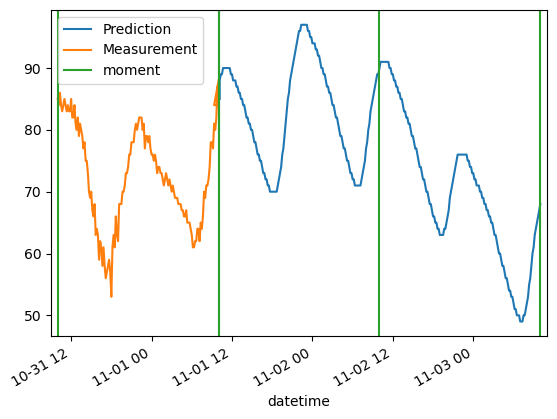

In [24]:
fig, ax = plt.subplots()
df_plot_measurements.plot(color="C0", ax=ax)
df_plot_forecast.plot(color="C1", ax=ax)
for val in df_plot_moments[df_plot_moments["measurement_location_id"] == 8420].index:
    ax.axvline(val, color="C2", label="moment")

time_series_moments = df_plot_moments[
    df_plot_moments["measurement_location_id"] == 8420
].index
# maak de grafiek iets breder om de lijnen te zien.
ax.set_xlim(
    (
        min(time_series_moments) - timedelta(hours=1),
        max(time_series_moments) + timedelta(hours=1),
    )
)
ax.legend(["Prediction", "Measurement", "moment"])

### Herhaal met getij

Configureer als volgt, met getij
```yaml
GlobalVariables:
    rootdir: "data_sets"  
    moments: [-24,0,24,48] 

    LoadsMaxima:
        tide: True

DataAdapter:
    waterstanden: 
        type: csv
        path: "hidden_waterstanden.csv"
        sep: ";"
    maxima:   
        type: csv
        path: "hidden_waterstanden_maxima.csv"       
```

In [25]:
from toolbox_continu_inzicht.loads import LoadsMatroos

test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

matroos_fsct = LoadsMatroos(data_adapter=data)
await matroos_fsct.run(input="BelastingLocaties", output="Waterstanden")

In [26]:
df_plot_getij = matroos_fsct.df_out
df_plot_getij

,measurement_location_id,measurement_location_code,measurement_location_description,parameter_id,parameter_code,datetime,unit,value,value_type
0,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-31 09:00:00+00:00,cm,141.99,meting
1,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-31 09:10:00+00:00,cm,146.14,meting
2,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-31 09:20:00+00:00,cm,149.81,meting
3,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-31 09:30:00+00:00,cm,155.00,meting
4,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-31 09:40:00+00:00,cm,160.58,meting
...,...,...,...,...,...,...,...,...,...
1655,18,vlissingen,Vlissingen,4724,WATHTE,2024-11-03 05:20:00+00:00,cm,-20.29,verwachting
1656,18,vlissingen,Vlissingen,4724,WATHTE,2024-11-03 05:30:00+00:00,cm,-38.82,verwachting
1657,18,vlissingen,Vlissingen,4724,WATHTE,2024-11-03 05:40:00+00:00,cm,-56.22,verwachting
1658,18,vlissingen,Vlissingen,4724,WATHTE,2024-11-03 05:50:00+00:00,cm,-72.76,verwachting


In [27]:
df_plot_getij.measurement_location_id.unique()

array([ 1,  2,  7, 18])

In [28]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_to_moments_tide_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

maxima_getij = LoadsToMoments(data_adapter=data)

maxima_getij.run(input="waterstanden", output="maxima")

In [29]:
df_plot_moments_getij = maxima_getij.df_out

In [30]:
measurement_location_id = 7

In [31]:
df_plot_getij["measurement_location_id"] = df_plot_getij[
    "measurement_location_id"
].apply(lambda x: int(x))  # TODO fix this issue
df_plot_measurements = df_plot_getij[
    df_plot_getij["measurement_location_id"] == measurement_location_id
]
df_plot_measurements = df_plot_measurements.set_index("datetime")

In [32]:
from datetime import datetime, timezone

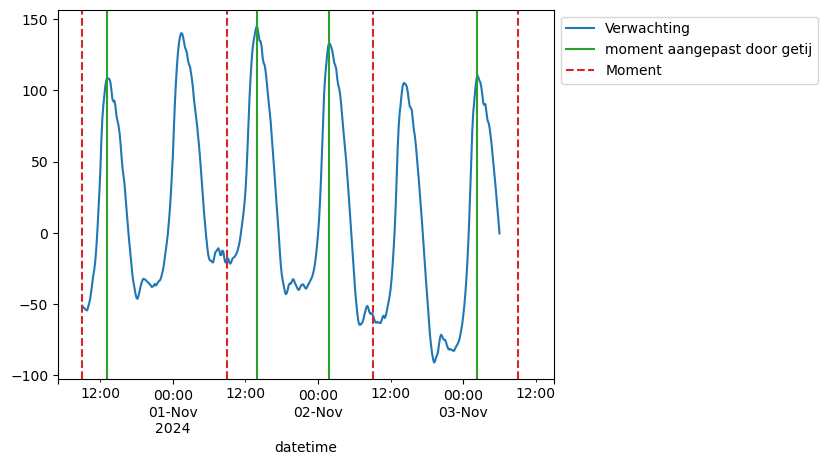

In [33]:
fig, ax = plt.subplots()
df_plot_measurements["value"].plot(color="C0", ax=ax, label="Verwachting")

for val in df_plot_moments_getij[
    df_plot_moments_getij["measurement_location_id"] == measurement_location_id
].index:
    ax.axvline(val, color="C2", label="moment aangepast door getij")

time_series_getij = df_plot_moments_getij[
    df_plot_moments_getij["measurement_location_id"] == measurement_location_id
].index
# maak de grafiek iets breder om de lijnen te zien.
ax.set_xlim(
    (
        min(time_series_getij) - timedelta(hours=1),
        max(time_series_getij) + timedelta(hours=1),
    )
)
dt_now = datetime.now(timezone.utc)
t_now = datetime(
    dt_now.year,
    dt_now.month,
    dt_now.day,
    dt_now.hour,
    0,
    0,
).replace(tzinfo=timezone.utc)
for moment in c.global_variables["moments"]:
    ax.axvline(t_now + timedelta(hours=moment), color="C3", ls="--", label="Moment")

ax.set_xlim(
    (
        min(time_series_moments) - timedelta(hours=5),
        max(time_series_moments) + timedelta(hours=5),
    )
)

handles, labels = ax.get_legend_handles_labels()
handles = handles[:2] + [handles[6]]
labels = ["Verwachting"] + labels[4:6]
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1, 1))